# Import

In [1]:
import pandas as pd
import pickle
import numpy as np


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

import warnings
warnings.filterwarnings("ignore")

# Загрузка данных

In [2]:
total_df = pd.read_csv('data/total_df_1.csv')
total_df.head()

,source,medium,campaign,adcontent,keyword,category,os,brand,dsr,browser,country,city,target,mobile,weekend,most_visited_city
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Moscow,0,1,0,0
1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0,1,1,1
2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,1,0,1
3,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0,1,1,1
4,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,aXQzDWsJuGXeBXexNHjc,mobile,iOS,Apple,375x812,Safari,Russia,Saint Petersburg,0,1,0,1


In [3]:
total_df = total_df.loc[0:50000, :]

# Преобразование категориальных признаков

Категориальные признаки преобразую с помощью OneHotEncoder из библиотеки sklearn

In [4]:
categorical_columns = ["category", "source", "medium", "campaign", "adcontent", "keyword", \
                       "os", "brand", "dsr", "browser", "country", "city"]

In [5]:
ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

ft = ohe.fit_transform(total_df[categorical_columns])
df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
df_ft.head()

,category_mobile,category_tablet,source_GpAkIXsclxDGyILfNlrR,source_ISrKoXQCxqqYvAZICvjs,source_IZEXUFLARCUMynmHNBGo,source_KgicpPxiEQfzPlPwQZJq,source_MvfHsxITijuriZxsqZqt,source_PlbkrSYoHuZBWfYjYnfw,source_QxAxdyPLuQMEcrdZWdWb,source_RmEBuqrriAfAVsLQQmhk,...,city_Vyborg,city_Yakutsk,city_Yaroslavl,city_Yekaterinburg,city_Yerevan,city_Yoshkar-Ola,city_Yuzhno-Sakhalinsk,city_Zheleznodorozhny,city_Zhukovskiy,city_Zvenigorod
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
transformed_df = pd.concat([total_df, df_ft], axis=1)
transformed_df = transformed_df.drop(categorical_columns, axis=1)
transformed_df.head()

,target,mobile,weekend,most_visited_city,category_mobile,category_tablet,source_GpAkIXsclxDGyILfNlrR,source_ISrKoXQCxqqYvAZICvjs,source_IZEXUFLARCUMynmHNBGo,source_KgicpPxiEQfzPlPwQZJq,...,city_Vyborg,city_Yakutsk,city_Yaroslavl,city_Yekaterinburg,city_Yerevan,city_Yoshkar-Ola,city_Yuzhno-Sakhalinsk,city_Zheleznodorozhny,city_Zhukovskiy,city_Zvenigorod
0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Разделение датасета на тренировочную и тестовую выборки

In [7]:
RANDOM_SEED = 1

train_df, test_df = train_test_split(transformed_df, stratify=transformed_df['target'], test_size=0.2, random_state=RANDOM_SEED)

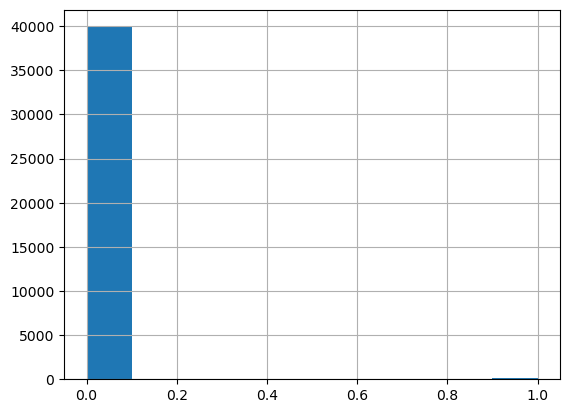

In [8]:
train_df['target'].hist();

Существует огромный дисбаланс в классах, количество минорного класса выровню с помощью SMOTE. 

In [9]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=RANDOM_SEED, k_neighbors=2)

features = train_df.columns.tolist()
target = 'target'

X_train, y_train = os.fit_resample(train_df[features], train_df[target])

In [10]:
X_train = X_train.drop('target', axis=1)

In [11]:
y_train.value_counts()

0    39880
1    39880
Name: target, dtype: int64

In [12]:
X_test = test_df.drop('target', axis=1)
X_test.head()

,mobile,weekend,most_visited_city,category_mobile,category_tablet,source_GpAkIXsclxDGyILfNlrR,source_ISrKoXQCxqqYvAZICvjs,source_IZEXUFLARCUMynmHNBGo,source_KgicpPxiEQfzPlPwQZJq,source_MvfHsxITijuriZxsqZqt,...,city_Vyborg,city_Yakutsk,city_Yaroslavl,city_Yekaterinburg,city_Yerevan,city_Yoshkar-Ola,city_Yuzhno-Sakhalinsk,city_Zheleznodorozhny,city_Zhukovskiy,city_Zvenigorod
7725,1,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40663,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13440,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5242,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10050,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
y_test = test_df['target']
y_test.head()

7725     0
40663    0
13440    0
5242     0
10050    0
Name: target, dtype: int64

In [14]:
y_test.value_counts()

0    9971
1      30
Name: target, dtype: int64

# Моделирование

Моделирование проведу в два этапа. В первом этапе обучение моделей выполню с параметрами по умолчанию. Во втором этапе гиперпараметры буду менять.

### Первый этап

#### Логистическая регрессия

In [15]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)

LogisticRegression()

In [16]:
print(classification_report(y_test, model_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      9971
           1       0.00      0.23      0.01        30

    accuracy                           0.80     10001
   macro avg       0.50      0.52      0.45     10001
weighted avg       0.99      0.80      0.89     10001



In [17]:
confusion_matrix(y_test, model_logreg.predict(X_test))

array([[8024, 1947],
       [  23,    7]], dtype=int64)

In [18]:
pred_lr = model_logreg.predict_proba(X_test)[:,1]

In [19]:
roc_auc_score(y_test, pred_lr)

0.5600374419148866

Text(0, 0.5, 'tpr')

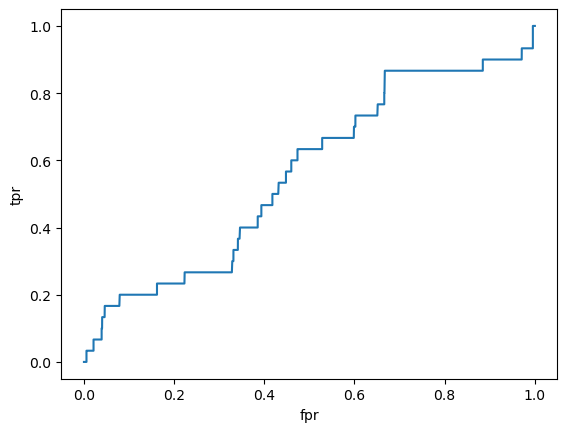

In [20]:
fpr, tpr, _ = roc_curve(y_test, pred_lr)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

#### Многослойный персептрон

In [30]:
model_mlp = MLPClassifier()

model_mlp.fit(X_train, y_train)

pred_mlp = model_mlp.predict_proba(X_test)[:,1]

Text(0, 0.5, 'tpr')

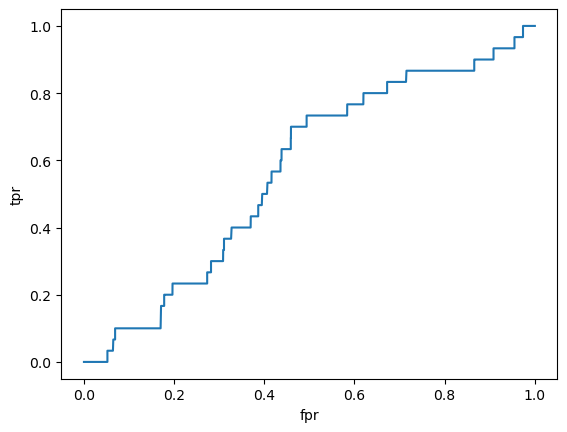

In [31]:
fpr, tpr, _ = roc_curve(y_test, pred_mlp)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [32]:
roc_auc_score(y_test, pred_mlp)

0.5681910874870457

In [33]:
confusion_matrix(y_test, model_mlp.predict(X_test))

array([[9743,  228],
       [  30,    0]], dtype=int64)

#### Решающее дерево

In [35]:
model_dtc = DecisionTreeClassifier()

model_dtc.fit(X_train, y_train)

pred_dtc = model_dtc.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'tpr')

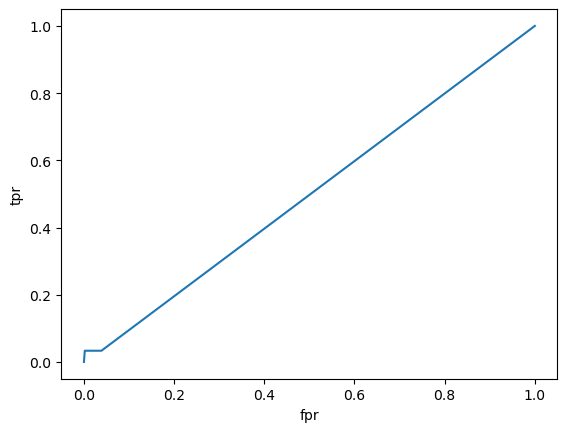

In [36]:
fpr, tpr, _ = roc_curve(y_test, pred_dtc)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [37]:
roc_auc_score(y_test, pred_dtc)

0.49787550563300237

In [38]:
confusion_matrix(y_test, model_dtc.predict(X_test))

array([[9818,  153],
       [  29,    1]], dtype=int64)

#### Случайный лес

In [39]:
model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)

pred_rf = model_rf.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'tpr')

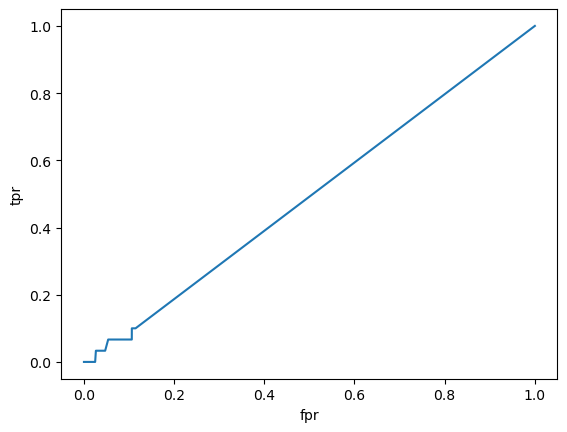

In [40]:
fpr, tpr, _ = roc_curve(y_test, pred_rf)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [41]:
roc_auc_score(y_test, pred_rf)

0.4924347273760572

In [42]:
confusion_matrix(y_test, model_rf.predict(X_test))

array([[9831,  140],
       [  30,    0]], dtype=int64)

## Второй этап

#### Логистическая регрессия

In [73]:
regs = []
recalls = []
thresholds = []
precisions = []

for reg in np.arange(0.01, 1, 0.1):
    # для каждого значения порога переведите вероятности в классы
    # посчитайте метрики
    
    # обучите логистическую регрессию с C=reg
    model = LogisticRegression(
        C=reg,  # Параметр регуляризации
        random_state=42,  # Фиксируем случайность
        )
    model.fit(X_train, y_train)
    
    probs_val = model.predict_proba(X_test)[:,1]
    
    max_recall = -1
    thr = -1
    max_prec = -1
    
    classes = (probs_val > threshold).astype(int)
    precision = precision_score(y_test, classes)
    recall = recall_score(y_test, classes)
    if (precision >= 0) and (recall >= max_recall):
        
        max_recall = recall
        thr = threshold
        max_prec = precision
        
    recalls.append(max_recall)
    thresholds.append(thr)
    precisions.append(max_prec)
    regs.append(reg)

print('max_recall:', max_recall)
print('thr:', thr)
print('max_prec:', max_prec)

max_recall: 0.7333333333333333
thr: 0.005
max_prec: 0.0033908754623921083


In [74]:
score_df = pd.DataFrame()
score_df['recalls'] = recalls
score_df['thresholds'] = thresholds
score_df['precisions'] = precisions
score_df['regs'] = regs
score_df

,recalls,thresholds,precisions,regs
0,1.000000,0.005,0.003006,0.01
1,0.900000,0.005,0.003033,0.11
2,0.866667,0.005,0.003135,0.21
3,0.866667,0.005,0.003366,0.31
4,0.866667,0.005,0.003528,0.41
5,0.866667,0.005,0.003565,0.51
6,0.866667,0.005,0.003752,0.61
7,0.866667,0.005,0.003789,0.71
8,0.866667,0.005,0.003892,0.81
9,0.733333,0.005,0.003391,0.91


In [75]:
score_df[score_df['recalls'] == score_df['recalls'].max()]

,recalls,thresholds,precisions,regs
0,1.0,0.005,0.003006,0.01


In [90]:
model_logreg = LogisticRegression(
        C=0.91,  # Параметр регуляризации
        random_state=42,  # Фиксируем случайность
        )

In [91]:
model_logreg.fit(X_train, y_train)

LogisticRegression(C=0.91, random_state=42)

In [92]:
pred_logreg = model_logreg.predict_proba(X_test)[:,1]

Text(0, 0.5, 'tpr')

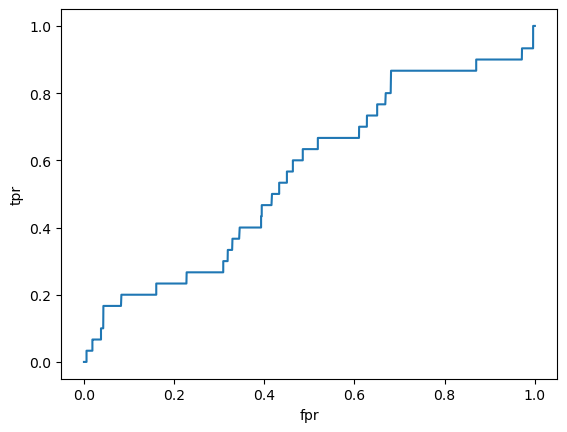

In [93]:
fpr, tpr, _ = roc_curve(y_test, pred_logreg)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [94]:
roc_auc_score(y_test, pred_logreg)

0.5591649115769064

In [95]:
confusion_matrix(y_test, model_logreg.predict(X_test))

array([[8007, 1964],
       [  23,    7]], dtype=int64)

In [97]:
print(classification_report(y_test, model_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      9971
           1       0.00      0.23      0.01        30

    accuracy                           0.80     10001
   macro avg       0.50      0.52      0.45     10001
weighted avg       0.99      0.80      0.89     10001



С помощью подбора гиперпараметра C не удалось улучшить качество модели.

#### Многослойный персептрон

In [98]:
params = {'solver': ['lbfgs'],
          'hidden_layer_sizes' : np.arange(75, 100, 10)}

gs = GridSearchCV(MLPClassifier(), params, cv=3, scoring='roc_auc')

gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': array([75, 85, 95]),
                         'solver': ['lbfgs']},
             scoring='roc_auc')

In [52]:
print('best score:', gs.best_score_)
print('best params:', gs.best_params_)

best score: 0.9981450731688845
best params: {'hidden_layer_sizes': 75, 'solver': 'lbfgs'}


In [99]:
model_mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(75,), alpha=1e-5)
model_mlp.fit(X_train, y_train)
pred_mlp = model_mlp.predict_proba(X_test)[:,1]
roc_auc_mlp = roc_auc_score(y_test, pred_mlp)
roc_auc_mlp

0.6104904222244509

Text(0, 0.5, 'tpr')

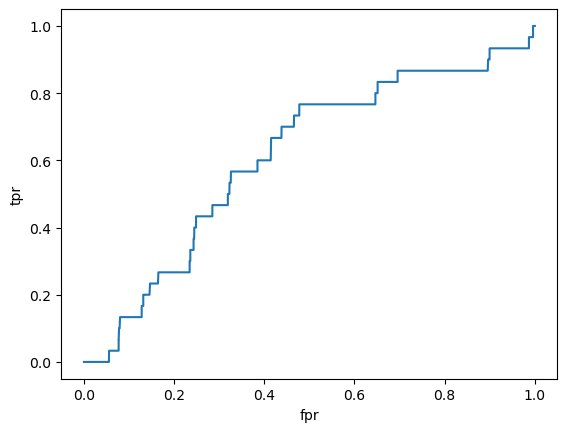

In [100]:
fpr, tpr, _ = roc_curve(y_test, pred_mlp)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [101]:
confusion_matrix(y_test, model_mlp.predict(X_test))

array([[9761,  210],
       [  30,    0]], dtype=int64)

In [102]:
print(classification_report(y_test, model_mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9971
           1       0.00      0.00      0.00        30

    accuracy                           0.98     10001
   macro avg       0.50      0.49      0.49     10001
weighted avg       0.99      0.98      0.98     10001



Для данной модели roc_auc > 60%. Попробую обучить на всем датасете

#### Решающее дерево

In [109]:
model_dtc = DecisionTreeClassifier()

In [110]:
params = {'max_depth' : np.arange(1, 10),
          'criterion' : ['gini', 'entropy']}

gs = GridSearchCV(model_dtc, params, cv=5, scoring='roc_auc')

gs.fit(X_train, y_train)

print('best score:', gs.best_score_)
print('best params:', gs.best_params_)

best score: 0.9690748917389078
best params: {'criterion': 'gini', 'max_depth': 9}


In [111]:
model_dtc = DecisionTreeClassifier(max_depth=7, criterion='entropy')
model_dtc.fit(X_train, y_train)
pred_dtc = model_dtc.predict_proba(X_test)[:,1]
roc_auc_dtc = roc_auc_score(y_test, pred_dtc)
roc_auc_dtc

0.484593654932638

Text(0, 0.5, 'tpr')

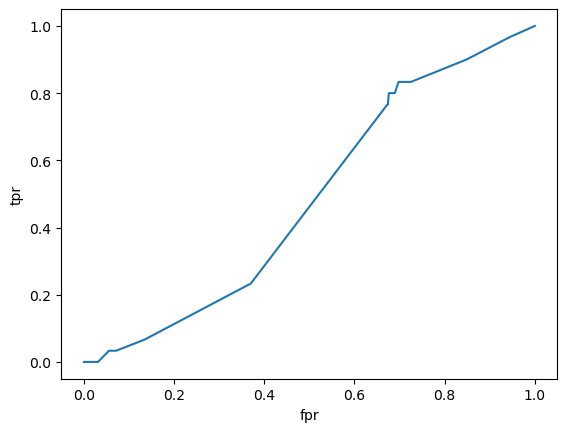

In [112]:
fpr, tpr, _ = roc_curve(y_test, pred_dtc)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [113]:
confusion_matrix(y_test, model_dtc.predict(X_test))

array([[9259,  712],
       [  29,    1]], dtype=int64)

In [114]:
print(classification_report(y_test, model_dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      9971
           1       0.00      0.03      0.00        30

    accuracy                           0.93     10001
   macro avg       0.50      0.48      0.48     10001
weighted avg       0.99      0.93      0.96     10001



#### Деревья решений

In [15]:
params = {'n_estimators': np.arange(10, 90, 20),
          'max_depth' : np.arange(2, 25, 4),
          'max_features' : ['sqrt', 'log2', None]}

gs = GridSearchCV(RandomForestClassifier(), params, cv=3, scoring='roc_auc')

gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  6, 10, 14, 18, 22]),
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': array([10, 30, 50, 70])},
             scoring='roc_auc')

In [16]:
gs.best_estimator_

RandomForestClassifier(max_depth=22, max_features='sqrt', n_estimators=70)

In [17]:
model_rf = RandomForestClassifier(max_depth=22, max_features='sqrt',
                       n_estimators=70)

In [18]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=22, max_features='sqrt', n_estimators=70)

In [19]:
pred_rf = model_rf.predict_proba(X_test)[:,1]

Text(0, 0.5, 'tpr')

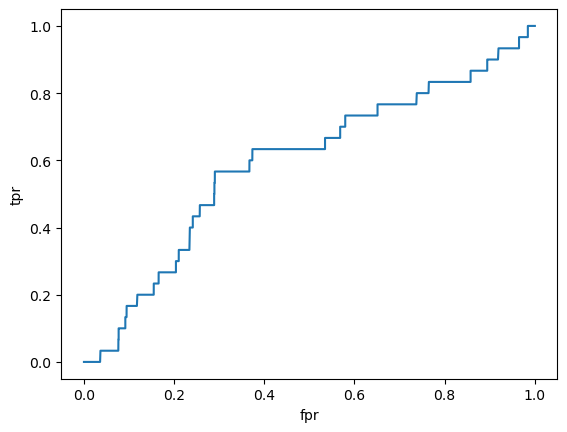

In [20]:
fpr, tpr, _ = roc_curve(y_test, pred_rf)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [21]:
roc_auc_score(y_test, pred_rf)

0.5913482432387256

In [22]:
print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9971
           1       0.00      0.00      0.00        30

    accuracy                           0.98     10001
   macro avg       0.50      0.49      0.50     10001
weighted avg       0.99      0.98      0.99     10001



In [23]:
confusion_matrix(y_test, model_rf.predict(X_test))

array([[9824,  147],
       [  30,    0]], dtype=int64)

Попробую улучшить качество модели, добавив дополнительные гиперпараметры

In [25]:
params = {'min_samples_leaf': np.arange(1, 16, 3),
          'min_samples_split': np.arange(1, 16, 3)
         }

gs = GridSearchCV(RandomForestClassifier(max_depth=22, max_features='sqrt',
                       n_estimators=70), params, cv=3, scoring='roc_auc')

gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=22, max_features='sqrt',
                                              n_estimators=70),
             param_grid={'min_samples_leaf': array([ 1,  4,  7, 10, 13]),
                         'min_samples_split': array([ 1,  4,  7, 10, 13])},
             scoring='roc_auc')

In [26]:
gs.best_estimator_

RandomForestClassifier(max_depth=22, max_features='sqrt', min_samples_split=13,
                       n_estimators=70)

In [27]:
model_rf = RandomForestClassifier(max_depth=22, max_features='sqrt',
                       n_estimators=70, min_samples_split=13)

In [28]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=22, max_features='sqrt', min_samples_split=13,
                       n_estimators=70)

In [29]:
pred_rf = model_rf.predict_proba(X_test)[:,1]

Text(0, 0.5, 'tpr')

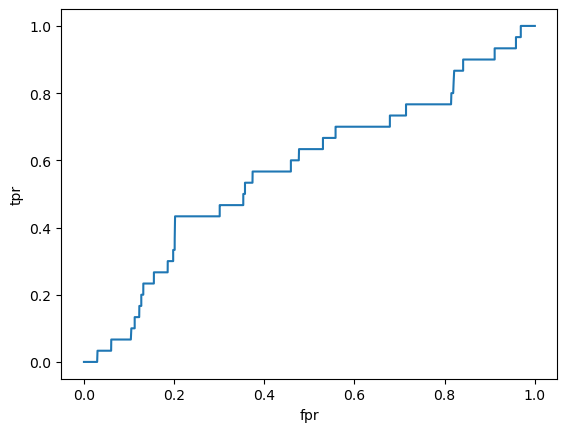

In [30]:
fpr, tpr, _ = roc_curve(y_test, pred_rf)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [31]:
roc_auc_score(y_test, pred_rf)

0.5744525791461906

In [32]:
confusion_matrix(y_test, model_rf.predict(X_test))

array([[9831,  140],
       [  30,    0]], dtype=int64)

Обучу модели на всем датасете с подобранными гиперпарамеирами. 

In [33]:
total_df = pd.read_csv('data/total_df_1.csv')
total_df.head()

,source,medium,campaign,adcontent,keyword,category,os,brand,dsr,browser,country,city,target,mobile,weekend,most_visited_city
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Moscow,0,1,0,0
1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0,1,1,1
2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,1,0,1
3,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0,1,1,1
4,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,aXQzDWsJuGXeBXexNHjc,mobile,iOS,Apple,375x812,Safari,Russia,Saint Petersburg,0,1,0,1


In [34]:
categorical_columns = ["category", "source", "medium", "campaign", "adcontent", "keyword", \
                       "os", "brand", "dsr", "browser", "country", "city"]

In [35]:
ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

ft = ohe.fit_transform(total_df[categorical_columns])
df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
df_ft.head()

,category_mobile,category_tablet,source_GpAkIXsclxDGyILfNlrR,source_ISrKoXQCxqqYvAZICvjs,source_IZEXUFLARCUMynmHNBGo,source_KgicpPxiEQfzPlPwQZJq,source_MvfHsxITijuriZxsqZqt,source_PlbkrSYoHuZBWfYjYnfw,source_QxAxdyPLuQMEcrdZWdWb,source_RmEBuqrriAfAVsLQQmhk,...,city_Vyborg,city_Yakutsk,city_Yaroslavl,city_Yekaterinburg,city_Yerevan,city_Yoshkar-Ola,city_Yuzhno-Sakhalinsk,city_Zheleznodorozhny,city_Zhukovskiy,city_Zvenigorod
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
transformed_df = pd.concat([total_df, df_ft], axis=1)
transformed_df = transformed_df.drop(categorical_columns, axis=1)
transformed_df.head()

,target,mobile,weekend,most_visited_city,category_mobile,category_tablet,source_GpAkIXsclxDGyILfNlrR,source_ISrKoXQCxqqYvAZICvjs,source_IZEXUFLARCUMynmHNBGo,source_KgicpPxiEQfzPlPwQZJq,...,city_Vyborg,city_Yakutsk,city_Yaroslavl,city_Yekaterinburg,city_Yerevan,city_Yoshkar-Ola,city_Yuzhno-Sakhalinsk,city_Zheleznodorozhny,city_Zhukovskiy,city_Zvenigorod
0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
RANDOM_SEED = 1

train_df, test_df = train_test_split(transformed_df, stratify=transformed_df['target'], test_size=0.2, random_state=RANDOM_SEED)

In [38]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=RANDOM_SEED, k_neighbors=2)


features = train_df.columns.tolist()
target = 'target'

X_train, y_train = os.fit_resample(train_df[features], train_df[target])

In [39]:
X_train = X_train.drop('target', axis=1)

In [40]:
y_train.value_counts()

0    1304623
1    1304623
Name: target, dtype: int64

In [41]:
X_test = test_df.drop('target', axis=1)
X_test.head()

,mobile,weekend,most_visited_city,category_mobile,category_tablet,source_GpAkIXsclxDGyILfNlrR,source_ISrKoXQCxqqYvAZICvjs,source_IZEXUFLARCUMynmHNBGo,source_KgicpPxiEQfzPlPwQZJq,source_MvfHsxITijuriZxsqZqt,...,city_Vyborg,city_Yakutsk,city_Yaroslavl,city_Yekaterinburg,city_Yerevan,city_Yoshkar-Ola,city_Yuzhno-Sakhalinsk,city_Zheleznodorozhny,city_Zhukovskiy,city_Zvenigorod
1576591,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1563769,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1495904,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1478832,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
284277,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
y_test = test_df['target']

In [43]:
y_test.value_counts()

0    326156
1       930
Name: target, dtype: int64

#### Логистическая регрессия

In [55]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)

LogisticRegression()

In [56]:
print(classification_report(y_test, model_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.61      0.75    326156
           1       0.00      0.56      0.01       930

    accuracy                           0.61    327086
   macro avg       0.50      0.58      0.38    327086
weighted avg       1.00      0.61      0.75    327086



In [17]:
confusion_matrix(y_test, model_logreg.predict(X_test))

array([[197685, 128471],
       [   408,    522]], dtype=int64)

In [18]:
pred_lr = model_logreg.predict_proba(X_test)[:,1]

In [19]:
roc_auc_score(y_test, pred_lr)

0.6317443005372322

Text(0, 0.5, 'tpr')

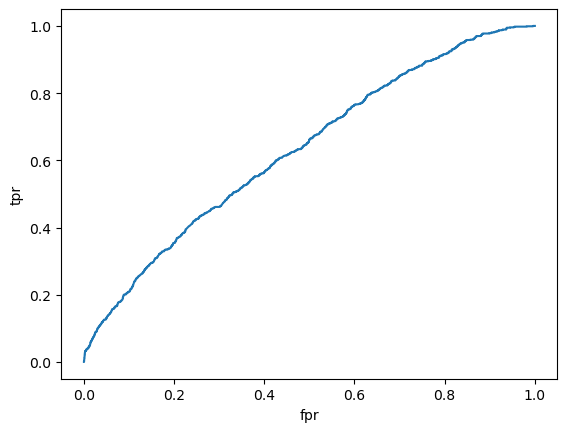

In [20]:
fpr, tpr, _ = roc_curve(y_test, pred_lr)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

#### Многослойный персептрон

In [57]:
model_mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(75,), alpha=1e-5)
model_mlp.fit(X_train, y_train)
pred_mlp = model_mlp.predict_proba(X_test)[:,1]
roc_auc_mlp = roc_auc_score(y_test, pred_mlp)
roc_auc_mlp

0.6057503718452822

Text(0, 0.5, 'tpr')

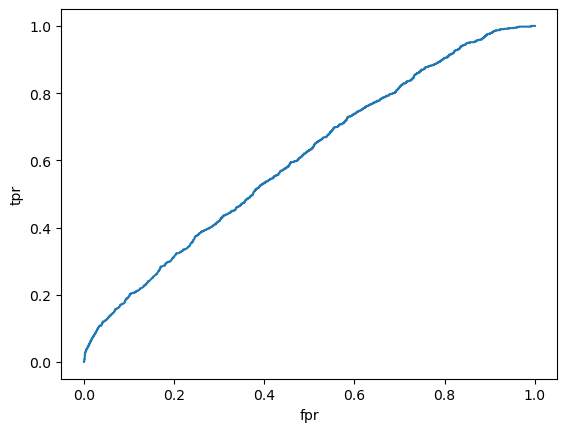

In [58]:
fpr, tpr, _ = roc_curve(y_test, pred_mlp)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [59]:
confusion_matrix(y_test, model_mlp.predict(X_test))

array([[261132,  65024],
       [   640,    290]], dtype=int64)

In [60]:
print(classification_report(y_test, model_mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89    326156
           1       0.00      0.31      0.01       930

    accuracy                           0.80    327086
   macro avg       0.50      0.56      0.45    327086
weighted avg       0.99      0.80      0.89    327086



#### Случайный лес

In [61]:
model_rf = RandomForestClassifier(max_depth=22, max_features='sqrt',
                       n_estimators=50)

In [62]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=22, max_features='sqrt', n_estimators=50)

In [63]:
pred_rf = model_rf.predict_proba(X_test)[:,1]

Text(0, 0.5, 'tpr')

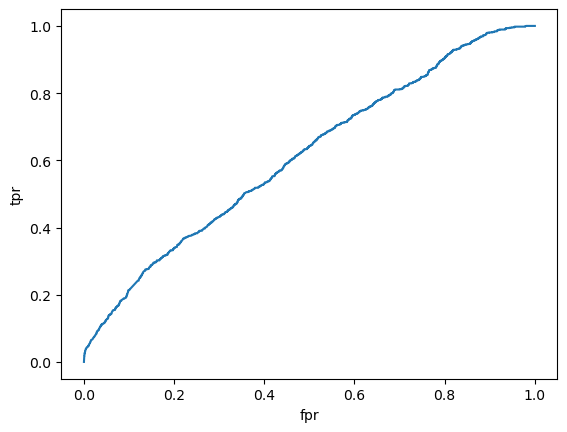

In [64]:
fpr, tpr, _ = roc_curve(y_test, pred_rf)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [65]:
roc_auc_score(y_test, pred_rf)

0.6121979544190674

In [66]:
confusion_matrix(y_test, model_rf.predict(X_test))

array([[265500,  60656],
       [   629,    301]], dtype=int64)

In [67]:
print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90    326156
           1       0.00      0.32      0.01       930

    accuracy                           0.81    327086
   macro avg       0.50      0.57      0.45    327086
weighted avg       0.99      0.81      0.89    327086



С гиперпараметром min_samples_split

In [49]:
model_rf = RandomForestClassifier(max_depth=22, max_features='sqrt',
                       n_estimators=50, min_samples_split=13)

In [50]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=22, max_features='sqrt', min_samples_split=13,
                       n_estimators=50)

Text(0, 0.5, 'tpr')

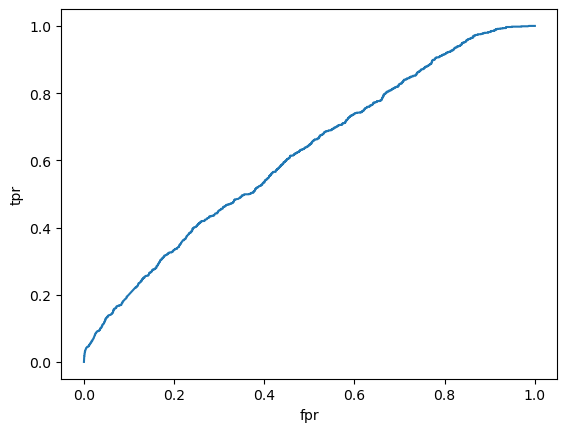

In [51]:
pred_rf = model_rf.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, pred_rf)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [52]:
roc_auc_score(y_test, pred_rf)

0.61714187300305

In [53]:
confusion_matrix(y_test, model_rf.predict(X_test))

array([[263279,  62877],
       [   627,    303]], dtype=int64)

In [54]:
print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89    326156
           1       0.00      0.33      0.01       930

    accuracy                           0.81    327086
   macro avg       0.50      0.57      0.45    327086
weighted avg       0.99      0.81      0.89    327086



## Вывод

Среди моделей логистическая регрессия, многослойный персептрон и деревья решений лучшей считаю модель случайный лес с показателями recall для класса 0 = 0.81 и для класса 1 = 0.33. Для логистической регрессии значение roc_auc выше, но количество ошибок для класса 0 значительно выше для для модели случайного леса.